In [1]:
from qaoa_and_tdvp import QAOA, QAOAResult
from MaxCut import MaxCut
import numpy as np
import pandas as pd
import pickle
import networkx as nx
from itertools import permutations, combinations_with_replacement, product
import swifter


In [2]:
with open('./results/data.p','rb')as f:
    data = pickle.load(f)

# Search instance with maximal difference in path length

In [3]:
scipy_vs_tdvp = data.xs(1,level='p',drop_level=False).apply(
    lambda row: abs(row['scipy']['path length']-row['tdvp']['path length']),
    axis=1,
    )
gd_vs_tdvp = data.xs(1,level='p',drop_level=False).apply(
    lambda row: abs(row['tdvp']['path length']-row['gradient_descent']['path length']),
    axis=1
    )


In [4]:
idx_1= max(gd_vs_tdvp.index, key=lambda idx: gd_vs_tdvp.loc[idx])
idx_1

(5, 1, 5)

In [5]:
idx_2= max(scipy_vs_tdvp.index, key=lambda idx: scipy_vs_tdvp.loc[idx])
idx_2

(3, 1, 0)

In [6]:
scipy_vs_tdvp.loc[idx_1]

6.545014586980474

In [7]:
scipy_vs_tdvp.loc[idx_2]

8.462882718162321

In [8]:
gd_vs_tdvp.loc[idx_1]

0.8717674310106336

In [9]:
gd_vs_tdvp.loc[idx_2]

0.03931027266919984

In [10]:
scipy_vs_tdvp.loc[idx_1] + gd_vs_tdvp.loc[idx_1]

7.416782017991108

In [11]:
scipy_vs_tdvp.loc[idx_2] + gd_vs_tdvp.loc[idx_2]

8.50219299083152

The instance n=5, p=1, i=5 ist most suitable, as it has almost the same combined difference as (3,1,0)

In [12]:
idx = (n,p,i) = (5,1,5)

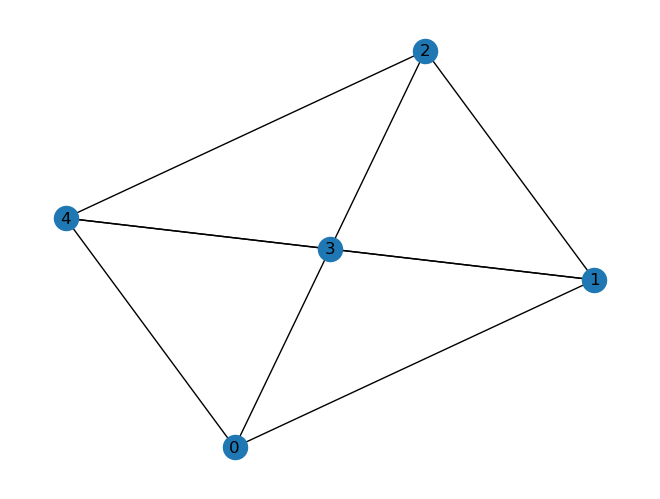

In [13]:
inst = data.loc[idx]['instance']
qaoa = QAOA(inst, p=p)
nx.draw(inst.graph, with_labels=True)

# Determine necessary grid size

In [14]:
path_tdvp = data.loc[idx]['tdvp']['path']
path_scipy = data.loc[idx]['scipy']['path']
path_gd = data.loc[idx]['gradient_descent']['path']
min_beta = min(path_scipy+path_gd+path_tdvp, key=lambda x:x[0])[0]
min_gamma = min(path_scipy+path_gd+path_tdvp, key=lambda x:x[1])[1]
max_beta = max(path_scipy+path_gd+path_tdvp, key=lambda x:x[0])[0]
max_gamma = max(path_scipy+path_gd+path_tdvp, key=lambda x:x[1])[1]

In [15]:
print(min_beta )
print(min_gamma)
print(max_beta )
print(max_gamma)

0.15465210312893096
0.4657838141204813
2.0
2.0


# Do the grid search

In [40]:
d1 = np.linspace(-.2,2.2,100)
grid = list(product(d1,repeat=2))

df = pd.DataFrame(data=grid, columns=['beta','gamma'])
df.insert(0,'delta', grid)
df["value"] = df.apply(lambda x: qaoa.expectation(x['delta']), axis=1)
df

,delta,beta,gamma,value
0,"(-0.2, -0.2)",-0.2,-0.200000,-6.422840
1,"(-0.2, -0.17575757575757578)",-0.2,-0.175758,-6.286094
2,"(-0.2, -0.15151515151515152)",-0.2,-0.151515,-5.941967
3,"(-0.2, -0.12727272727272726)",-0.2,-0.127273,-5.396681
4,"(-0.2, -0.10303030303030303)",-0.2,-0.103030,-4.662730
...,...,...,...,...
9995,"(2.2, 2.103030303030303)",2.2,2.103030,-0.456039
9996,"(2.2, 2.1272727272727274)",2.2,2.127273,-0.395675
9997,"(2.2, 2.151515151515152)",2.2,2.151515,-0.322059
9998,"(2.2, 2.175757575757576)",2.2,2.175758,-0.233531


In [1]:
with open('./results/grid_search_n5_p1_i5.p','wb') as f:
    pickle.dump(df,f)

NameError: name 'pickle' is not defined